<a href="https://colab.research.google.com/github/jkcg-learning/KaggleChallenge_CassavaLeafPrediction/blob/main/cassavaleafprediction_modelcreation_jyothish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from google.colab import files
files.upload() #upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jyothishkumar","key":"e9061640bd94d233d0066ddc179afdc8"}'}

# New Section

In [15]:
#!mkdir ~/.kaggle
#!touch ~/.kaggle/kaggle.json

#api_token = {"username":"jyothishkumar","key":"e9061640bd94d233d0066ddc179afdc8"}


#import json

#with open('/root/.kaggle/kaggle.json', 'w') as file:
#    json.dump(api_token, file)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!cat ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json

{"username":"jyothishkumar","key":"e9061640bd94d233d0066ddc179afdc8"}

In [16]:

!kaggle competitions download -c cassava-leaf-disease-classification

100% 5.76G/5.76G [02:04<00:00, 41.6MB/s]
100% 5.76G/5.76G [02:04<00:00, 49.6MB/s]


In [17]:
!unzip /content/cassava-leaf-disease-classification.zip  && rm /content/cassava-leaf-disease-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/3954399974.jpg  
  inflating: train_images/3954487465.jpg  
  inflating: train_images/3954910918.jpg  
  inflating: train_images/3955391972.jpg  
  inflating: train_images/3955442838.jpg  
  inflating: train_images/3955739563.jpg  
  inflating: train_images/3955931830.jpg  
  inflating: train_images/3955972139.jpg  
  inflating: train_images/3956075690.jpg  
  inflating: train_images/3956077728.jpg  
  inflating: train_images/3956155774.jpg  
  inflating: train_images/3956271103.jpg  
  inflating: train_images/3956372146.jpg  
  inflating: train_images/3956407201.jpg  
  inflating: train_images/3956550570.jpg  
  inflating: train_images/3956605397.jpg  
  inflating: train_images/3956778160.jpg  
  inflating: train_images/3957562076.jpg  
  inflating: train_images/3957612771.jpg  
  inflating: train_images/3957807023.jpg  
  inflating: train_images/3957819631.jpg  
  inflating: train_images/395820132.jpg  
  in

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/train_images/3164836946.jpg
/content/train_images/2609479763.jpg
/content/train_images/1652920595.jpg
/content/train_images/2802828070.jpg
/content/train_images/744676370.jpg
/content/train_images/4018949072.jpg
/content/train_images/2591792455.jpg
/content/train_images/2036664947.jpg
/content/train_images/1286828340.jpg
/content/train_images/2913849934.jpg
/content/train_images/2771999001.jpg
/content/train_images/1401539761.jpg
/content/train_images/3050606537.jpg
/content/train_images/1772713207.jpg
/content/train_images/2728936550.jpg
/content/train_images/4138957556.jpg
/content/train_images/585209164.jpg
/content/train_images/3924271775.jpg
/content/train_images/1543816901.jpg
/content/train_images/352468512.jpg
/content/train_images/742038371.jpg
/content/train_images/4200880538.jpg
/content/train_images/631859689.jpg
/content/train_images/662050128.jpg
/content/train_images/2217091217.jpg
/content/train_images/30533273

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD,Adam,RMSprop,Nadam
from keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import TensorBoard, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

%load_ext tensorboard



#Helper libraries
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
print("Number of accelerators: ", strategy.num_replicas_in_sync)

2.4.0
Num GPUs Available:  1
Number of accelerators:  1


In [20]:
# Defining the working directories

work_dir = '/content/'
os.listdir(work_dir) 
train_path = '/content/train_images/'

In [21]:

train_data = pd.read_csv(work_dir + 'train.csv')
train_data.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [22]:
total_nums = train_data.shape[0]
total_nums


21397

In [23]:
print(train_data['label'].value_counts()) # Checking the frequencies of the labels

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64


In [24]:
train_data.columns

Index(['image_id', 'label'], dtype='object')

In [25]:
import json
disease_names = open(work_dir + '/label_num_to_disease_map.json')
disease_names = json.load(disease_names)
train_data['disease_name'] = train_data['label'].apply(lambda x: disease_names[str(x)])
#visualize top 20 rows from table
train_data.head(20)

,image_id,label,disease_name
0,1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,3,Cassava Mosaic Disease (CMD)
5,1000837476.jpg,3,Cassava Mosaic Disease (CMD)
6,1000910826.jpg,2,Cassava Green Mottle (CGM)
7,1001320321.jpg,0,Cassava Bacterial Blight (CBB)
8,1001723730.jpg,4,Healthy
9,1001742395.jpg,3,Cassava Mosaic Disease (CMD)


In [26]:
train_data.disease_name.value_counts()

Cassava Mosaic Disease (CMD)           13158
Healthy                                 2577
Cassava Green Mottle (CGM)              2386
Cassava Brown Streak Disease (CBSD)     2189
Cassava Bacterial Blight (CBB)          1087
Name: disease_name, dtype: int64

In [27]:
num_classes = len(train_data.disease_name.unique())
num_classes

5

In [28]:
file_paths = [[fname, work_dir+'train_images/' + fname] for fname in (train_data['image_id'])]
file_paths[0:10]

[['1000015157.jpg', '/content/train_images/1000015157.jpg'],
 ['1000201771.jpg', '/content/train_images/1000201771.jpg'],
 ['100042118.jpg', '/content/train_images/100042118.jpg'],
 ['1000723321.jpg', '/content/train_images/1000723321.jpg'],
 ['1000812911.jpg', '/content/train_images/1000812911.jpg'],
 ['1000837476.jpg', '/content/train_images/1000837476.jpg'],
 ['1000910826.jpg', '/content/train_images/1000910826.jpg'],
 ['1001320321.jpg', '/content/train_images/1001320321.jpg'],
 ['1001723730.jpg', '/content/train_images/1001723730.jpg'],
 ['1001742395.jpg', '/content/train_images/1001742395.jpg']]

In [29]:
# Confirm if number of images is same as number of labels given
if len(train_data) == len(file_paths):
    print('Number of labels i.e. ', len(train_data), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  21397 matches the number of filenames i.e.  21397


In [30]:
images = pd.DataFrame(file_paths, columns=['image_id', 'filepaths'])
images.head()

,image_id,filepaths
0,1000015157.jpg,/content/train_images/1000015157.jpg
1,1000201771.jpg,/content/train_images/1000201771.jpg
2,100042118.jpg,/content/train_images/100042118.jpg
3,1000723321.jpg,/content/train_images/1000723321.jpg
4,1000812911.jpg,/content/train_images/1000812911.jpg


In [31]:
train_data_modified = pd.merge(images, train_data, how = 'inner', on = 'image_id')
train_data_modified.head(10) 

,image_id,filepaths,label,disease_name
0,1000015157.jpg,/content/train_images/1000015157.jpg,0,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,/content/train_images/1000201771.jpg,3,Cassava Mosaic Disease (CMD)
2,100042118.jpg,/content/train_images/100042118.jpg,1,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,/content/train_images/1000723321.jpg,1,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,/content/train_images/1000812911.jpg,3,Cassava Mosaic Disease (CMD)
5,1000837476.jpg,/content/train_images/1000837476.jpg,3,Cassava Mosaic Disease (CMD)
6,1000910826.jpg,/content/train_images/1000910826.jpg,2,Cassava Green Mottle (CGM)
7,1001320321.jpg,/content/train_images/1001320321.jpg,0,Cassava Bacterial Blight (CBB)
8,1001723730.jpg,/content/train_images/1001723730.jpg,4,Healthy
9,1001742395.jpg,/content/train_images/1001742395.jpg,3,Cassava Mosaic Disease (CMD)


In [32]:
train_data_modified['label']= train_data_modified['label'].astype('str')
train_data_modified['label']

0        0
1        3
2        1
3        1
4        3
        ..
21392    3
21393    3
21394    1
21395    4
21396    4
Name: label, Length: 21397, dtype: object

In [33]:
count_disease = train_data_modified['label'].value_counts()
count_disease

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [52]:
#importing necessary libraries
import cv2
IMG_SIZE = 300


In [53]:
train_datagen = ImageDataGenerator(rescale = 1./255., # rescaling
                                   rotation_range = 20,  # for augmentation
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   vertical_flip=True,
                                   horizontal_flip = True,
                                   validation_split = 0.2)

val_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                 validation_split = 0.2)

train_generator = train_datagen.flow_from_dataframe(directory= train_path,
                                                    dataframe = train_data_modified,
                                                    batch_size = 32,
                                                    x_col="image_id",
                                                    y_col="label",
                                                    subset="training",
                                                    seed=42,
                                                    shuffle=True,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE,IMG_SIZE))

val_generator = val_datagen.flow_from_dataframe(directory = train_path,
                                                    dataframe = train_data_modified,
                                                    batch_size = 32,
                                                    x_col="image_id",
                                                    y_col="label",
                                                    subset = "validation",
                                                    seed=42,
                                                    shuffle=True,
                                                    class_mode = 'categorical', 
                                                    target_size = (IMG_SIZE,IMG_SIZE))

Found 17118 validated image filenames belonging to 5 classes.
Found 4279 validated image filenames belonging to 5 classes.


In [36]:
train_generator.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}

In [37]:
class_weights_disease = {}
i= 0


for key in train_generator.class_indices.keys():
    class_weights_disease[i] = total_nums / (num_classes * count_disease[key])
    i+=1

class_weights_disease  

{0: 3.9368905243790246,
 1: 1.954956601187757,
 2: 1.7935456831517183,
 3: 0.3252317981456148,
 4: 1.6606131160263873}

In [54]:
def plot_images(data_generator=None):
    plt.figure(figsize=(10, 10))
    if data_generator is not None:
        images,labels=data_generator.next()
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            images[i,:,:,:]=images[i,:,:,:]*255.0
            plt.xticks([])
            plt.yticks([])
            plt.imshow(images[i,:,:,:].astype("uint8"))
            #plt.title(class_names[int(labels[i][0])])
            #plt.title(train_generator.class_indices.index(i))
            plt.title(np.argmax(labels[i]).astype(str))
            #plt.xlabel(train_data_modified.loc[train_data_modified['label'] == disease_title, 'disease_name'].item())
            
            #plt.axis("off")

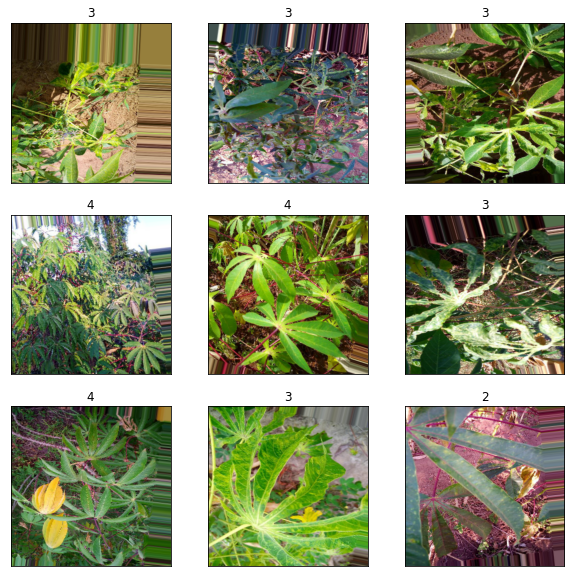

In [55]:
plot_images(train_generator)

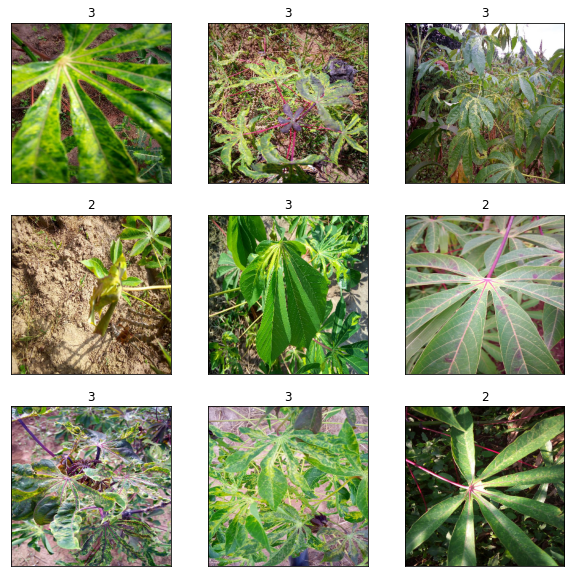

In [56]:
plot_images(val_generator)

In [40]:
# plotting helper function
def plotaccuracy(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [42]:
# plotting helper function
def plotloss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [57]:
# define input shape
INPUT_SHAPE_EFFICIENTNET = (IMG_SIZE, IMG_SIZE, 3)

EfficientNet_layers = keras.applications.EfficientNetB3(weights='imagenet', include_top=False, 
                                               input_shape=INPUT_SHAPE_EFFICIENTNET)

EfficientNet_layers.summary()

Model: "efficientnetb3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 300, 300, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
normalization_1 (Normalization) (None, 300, 300, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 301, 301, 3)  0           normalization_1[0][0]            
_____________________________________________________________________________________

In [58]:
# Fine-tune all the layers
for layer in EfficientNet_layers.layers:
    layer.trainable = True

# Check the trainable status of the individual layers
for layer in EfficientNet_layers.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4956dc9e48> True
<tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f4956dd9438> True
<tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f4960806320> True
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f495e113320> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f495e54ee10> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f494def3080> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f4956dea390> True
<tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f494df33f98> True
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f4956d864a8> True
<tensorflow.python.keras.layers.core.Activation object at 0x7f4956dfcac8> True
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f4

In [ ]:
#learn_rate=.001
#adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [59]:
# define sequential model
model_EfficientNet = Sequential()

# Add the efficientNet convolutional base model
model_EfficientNet.add(EfficientNet_layers)
model_EfficientNet.add(GlobalAveragePooling2D())
model_EfficientNet.add(Dropout(0.3))

model_EfficientNet.add(Dense(5, activation='softmax'))
#model_ResNet.add(Dense(35))
#SparseCategoricalCrossentropy(from_logits=True)
# compile model
model_EfficientNet.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')

# view model layers
model_EfficientNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 10, 10, 1536)      10783535  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 7685      
Total params: 10,791,220
Trainable params: 10,703,917
Non-trainable params: 87,303
_________________________________________________________________


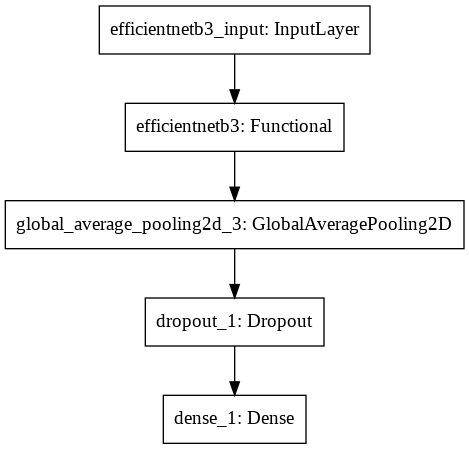

In [60]:
keras.utils.plot_model(model_EfficientNet)

In [61]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    './best_weights.h5',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

es_callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=4,
    verbose=1,
    mode="min",
    restore_best_weights=True,
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=2,
    verbose=1,
    mode="min",
    min_delta=0.001,
)

In [62]:
EPOCHS = 20
BATCH_SIZE = 32

history_EfficientNet = model_EfficientNet.fit(train_generator,
                    validation_data = val_generator,
                    batch_size=BATCH_SIZE,
                    steps_per_epoch=(len(train_data_modified)*0.8) // BATCH_SIZE,
                    validation_steps=(len(train_data_modified)*0.2) // BATCH_SIZE,
                    callbacks = [model_checkpoint, es_callback, reduce_lr], 
                    epochs=EPOCHS,
                    class_weight = class_weights_disease,
                    verbose=1)

Epoch 1/20
534/534 [==============================] - 743s 1s/step - loss: 1.4045 - accuracy: 0.4359 - val_loss: 1.9965 - val_accuracy: 0.1285

Epoch 00001: val_loss improved from inf to 1.99649, saving model to ./best_weights.h5
Epoch 2/20
534/534 [==============================] - 694s 1s/step - loss: 0.9700 - accuracy: 0.6816 - val_loss: 1.6745 - val_accuracy: 0.3614

Epoch 00002: val_loss improved from 1.99649 to 1.67453, saving model to ./best_weights.h5
Epoch 3/20
534/534 [==============================] - 695s 1s/step - loss: 0.8045 - accuracy: 0.7368 - val_loss: 2.2571 - val_accuracy: 0.0909

Epoch 00003: val_loss did not improve from 1.67453
Epoch 4/20
534/534 [==============================] - 694s 1s/step - loss: 0.7233 - accuracy: 0.7765 - val_loss: 1.9424 - val_accuracy: 0.1393

Epoch 00004: val_loss did not improve from 1.67453

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 5/20
534/534 [==============================] - 693s 1s/ste

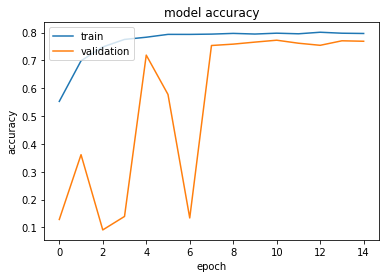

In [63]:
plotaccuracy(history_EfficientNet)

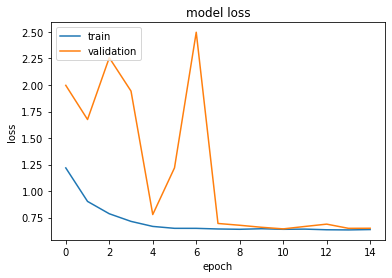

In [64]:
plotloss(history_EfficientNet)

In [65]:
model_EfficientNet.save('/content/best_weights.h5')  

In [66]:
model_EfficientNet.save('/content/classweights_best_weights_efficientNetB4_layers_trainable_true.h5')  

In [67]:
!pwd

/content


In [68]:
test_imgs_folder = '/content/test_images/'
test_csv = '/content/sample_submission.csv'
submission = pd.read_csv(test_csv)  # Read the sample_submission.csv.

submission

,image_id,label
0,2216849948.jpg,4


In [69]:
preds = [] 

In [70]:



for image in submission.image_id:
    img = keras.preprocessing.image.load_img('/content/test_images/' + image)
    img = keras.preprocessing.image.img_to_array(img)
    img = keras.preprocessing.image.smart_resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.convert_to_tensor(img, np.float32)
    img = tf.reshape(img,[1 ,IMG_SIZE,IMG_SIZE,3])
    img = np.divide(img, 255.0)
    #img = np.expand_dims(img, 0) 
    prediction = model_EfficientNet.predict(img)
    #print(prediction)
    preds.append(np.argmax(prediction))
    #print(preds)

my_submission = pd.DataFrame({'image_id': submission.image_id, 'label': preds})
my_submission.to_csv('submission.csv', index=False) 

In [71]:
my_submission

,image_id,label
0,2216849948.jpg,4
